In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

# Метод максимальної правдоподібності.

Нехай в нас є випадкова величина із ймовірнісним розподілом $\xi \sim p(x, \overrightarrow{\theta})$ , де p - щільність розподілу, $\overrightarrow{\theta}$ - невідомі параметри розподілу

Наприклад, $$\overrightarrow{\theta} = (a, \sigma^2)$$ 

$$ p(x, a, \sigma^2) = \cfrac {1}{\sqrt{2 \pi \sigma^2}} \exp(\cfrac{-(x-a)^2}{2\sigma^2}) $$ для нормального розподілу

Маємо вибірку із цього розподілу $ (x_1, x_2, ... x_k)  $ , але не знаємо значень параметрів $ (a, \sigma^2) $

In [2]:
a = 0 #mean
#sigma - unknown

sample = np.random.normal(loc = a, size = 100)
sample

array([ 1.16734279, -1.54107911,  0.12933443,  0.44814811, -0.36265224,
        0.23958882,  1.48352214,  0.79114736, -0.24896605,  0.95862586,
        2.69271494, -0.15969957,  1.10437067, -0.70616676, -0.78975444,
       -0.603558  ,  0.13312656,  0.79341215, -0.09862537, -1.00538368,
       -0.67203209, -0.16944716,  0.69655424,  0.78214408, -0.6932182 ,
       -0.44496006,  0.32027854,  0.38105445, -2.01650965, -1.51354   ,
        0.05766364, -0.49576109, -1.20586109, -0.32171455, -0.2835622 ,
       -1.60840477,  1.41319348, -0.35577368, -1.202393  , -0.55703952,
       -0.68761198,  1.45434454,  1.06445022,  0.37131387,  1.39904245,
       -0.64623332, -0.41707299,  2.00822032,  0.29445335, -0.25422188,
       -0.80326442, -1.50128455,  0.32679408,  0.19668246,  0.49300245,
       -1.88353989, -0.97821804, -0.71810799, -0.22576705,  0.23038557,
        1.29926208, -0.92185203,  1.83312054,  1.61746529,  0.23657005,
        1.28294363, -1.26636798, -0.61553611, -0.38046962, -0.98

За вибіркою можна ввести функцію правдоподібності, яка означатиме ймовірність, що вибірка отримана із даного розподілу:

$$ Likelihood(x_1, x_2, ... , x_k, \overrightarrow{\theta} ) = \prod_{i=1}^{k} p(x_i, \overrightarrow{\theta}) $$

або ще часто беруть її логарифм, для того щоб перетворити добуток на суму

$$ logLikelihood(x_1, x_2, ... , x_k, \overrightarrow{\theta} ) = \sum_{i=1}^{k} log p(x_i, \overrightarrow{\theta}) $$

Ідея методу максимальної правдоподібності полягає у тому, щоб привести функцію правдоподібності до максимуму і знайти параметри розподілу, які дають максимум функції правдоподібності:

$$ \prod_{i=1}^{k} p(x_i, \overrightarrow{\theta}) \rightarrow max_{\theta} $$

Або, що те ж саме, дають максимум логарифму правдоподібності:

$$ \sum_{i=1}^{k} log p(x_i, \overrightarrow{\theta}) \rightarrow max_{\theta} $$

Покажемо як змінюється правдоподібність залежно від невідомого параметра, підрахуємо правдоподібність залежно від різних сігма

In [3]:
#stats.norm.pdf - щільність нормального розподілу

sigma_arr = np.arange(0.5, 2.0, 0.1) #для графіку, побудуємо логарифм правдоподібності при різних sigma
sigma_arr

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9])

In [4]:
def log_likelihood_normal(sample, a, sigma):
    result = 0
    for x in sample:
        result += np.log(stats.norm.pdf(x, loc = a, scale = sigma))
    return result

likelihood_arr = [log_likelihood_normal(sample, a=a, sigma = val) for val in sigma_arr]

Інтуїтивно за графіком можна визначити, що максимум правдоподібності приблизно при $\sigma = 0.9$ або $\sigma = 1.0$

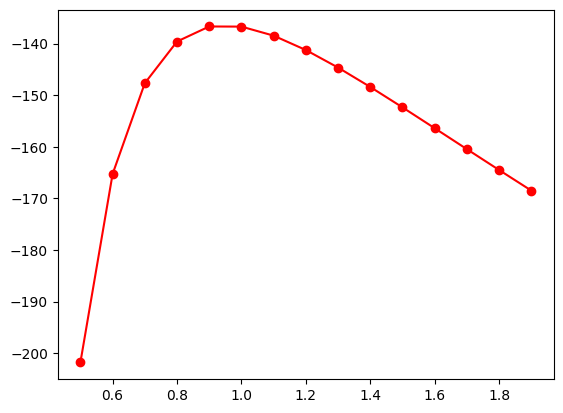

In [5]:
plt.plot(sigma_arr, likelihood_arr, color = 'red', marker = 'o')

В деяких випадках оцінки параметрів можна знайти аналітично. Зокрема, розглянемо вибірку отриману із нормального розподілу:

Нехай $ (x_1, ... , x_k) $ - значення, згенеровані із розподілу $ \xi \sim N(a, \sigma^2) $ . Розглянемо функцію правдоподібності для нормальної вибірки:

$ Likelihood(x_1, ... , x_k, a, \sigma^2)$ = $\prod_{i=1}^k \cfrac{1}{\sqrt{2 \pi \sigma^2}} exp ( - \cfrac{(x_k-a)^2}{2 \sigma^2} ) $

Її зазвичай зручніше записати у логарифмічній формі

$ logLikelihood(x_1, ... , x_k, a, \sigma^2)$ = $\sum_{i=1}^k (-\cfrac{log(2 \pi \sigma^2)}{2} - \cfrac{(x_k-a)^2}{2 \sigma^2} ) =  -\cfrac{klog(2 \pi \sigma^2)}{2} - \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2}$

Застосуємо обговорений вище "метод максимальної правдоподібності" :

$ -\cfrac{klog(2 \pi \sigma^2)}{2} - \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

$ -\cfrac{klog(2 \pi)}{2} -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

$ -\cfrac{klog(2 \pi)}{2} $ не залежить ні від a, ні від сігма, тому його можна прибрати із максимізації:

$ -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

Виведемо оцінку для a, взявши похідну від функції правдоподібності

$ \cfrac{d(...)}{da} = \sum_{i=1}^k \cfrac{2(x_k-a)(-1)}{2 \sigma^2} = 0 $

$ \sum_{i=1}^k (a-x_k) = 0 $ 

$ \sum_{i=1}^k (x_k) = k a $

$ a = \cfrac{1}{k} \sum_{i=1}^k x_k $, що за своїм сенсом є середнім арифметичним вибірки

Порахуємо оцінку за вибіркою (очікуємо, що значення будуть близькі до нуля):

In [6]:
a_est = np.mean(sample)
a_est

0.0040775120029164095

$ -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

Виведемо оцінку для $\sigma^2$, взявши похідну від функції правдоподібності

$ \cfrac{d(...)}{d\sigma^2} =  -\cfrac{k}{2\sigma^2} + \sum_{i=1}^k \cfrac{(x-a)^2}{2 \sigma^4} = 0$

скоротимо вираз на $ 2 \sigma^2 $

$ -k + \sum_{i=1}^k \cfrac{(x-a)^2}{\sigma^2} = 0 $

$ \sigma^2 = \cfrac{1}{k} \sum_{i=1}^k (x-a)^2 $ , що за фізичним сенсом є середньоквадратичним відхиленням.

Порахуємо оцінку за вибіркою (очікуємо, що значення будуть близькі до нуля):

In [8]:
sigma_sq_est = ((sample - a)**2).mean()
sigma_sq_est

0.8961824492440627